<a href="https://colab.research.google.com/github/JK-Pair/Stock_analysis_project/blob/master/Thai_Stock_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader

In [6]:
import os, sys
import numpy as np
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML
from datetime import date

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
stock_list =  ['KBANK'] # "AOT", "ICHI", "CPALL", "CPF", "ASIMAR", "AAV", "AU", 'SCB', 'BBL', 'KTB', 'AOT', 'PTT'
start_date = "2020-05-19" 
end_date = date.today().strftime("%Y-%m-%d")

In [8]:
data = {}
for quote in tqdm(stock_list):
    try:        
        data[quote] = pdr.get_data_yahoo('{}.BK'.format(quote), start=start_date, end=end_date)        
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1]) 

100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


In [9]:
print("Show all stocks in the list", list(data.keys()))
[ df.head() for key, df in data.items()]

Show all stocks in the list ['KBANK']


[             High    Low   Open  Close    Volume  Adj Close
 Date                                                       
 2020-05-19  87.75  84.00  84.25  87.00  26622000      87.00
 2020-05-20  88.50  87.00  88.00  88.00  16666600      88.00
 2020-05-21  88.50  86.75  88.50  87.25  12975400      87.25
 2020-05-22  86.75  84.75  86.75  85.50  12036200      85.50
 2020-05-25  87.50  86.00  86.00  87.00   5999300      87.00]

[Text(0.5, 1.0, 'KBANK')]

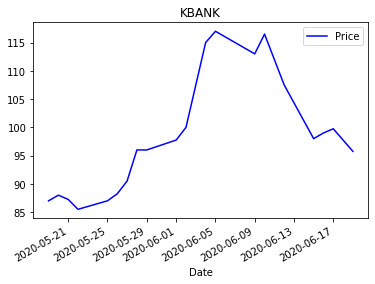

In [10]:
[ df.plot(y='Adj Close', label='Price', style='-b').set_title(key)  for key, df in data.items()]

In [3]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 614kB 563kB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=bbc18ca3e8fbbfce088d31df69ab952b32b893556564c01bcbf09ccbef468c21
  Stored in directory: /tmp/pip-ephem-wheel-cache-0bs6cs58/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [26]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import num2date, date2num
import numpy as np
import matplotlib.dates
import pandas

dates= pd.date_range(start_date, end_date).tolist()
datesList = []
datesList = [dates[item].toordinal() for item in range(len(dates))]

# dates = [732797.0, 732828.0, 732858.0, 732889.0, 732920.0, 732950.0, 732981.0, 733011.0, 733042.0, 733073.0, 733102.0, 733133.0, 733163.0, 733194.0, 733224.0, 733255.0, 733286.0, 733316.0, 733347.0, 733377.0, 733408.0, 733439.0, 733467.0, 733498.0, 733528.0, 733559.0, 733589.0, 733620.0, 733651.0, 733681.0, 733712.0, 733742.0] 
kurse_o = [60.0, 68.15, 68.08, 65.01, 66.1, 70.59, 75.69, 69.12, 66.25, 53.15, 54.61, 70.36, 66.14, 78.08, 85.1, 75.26, 64.23, 62.89, 66.9, 61.15, 61.36, 53.93, 61.4, 62.29, 62.85, 65.26, 62.4, 70.18, 70.25, 69.2, 69.55, 68.51]
kurse_h = [68.49, 69.66, 71.0, 67.2, 71.14, 78.85, 76.64, 71.6, 66.61, 57.81, 56.07, 76.72, 79.89, 84.73, 85.5, 75.26, 65.86, 68.52, 66.95, 62.1, 61.41, 62.49, 63.8, 64.59, 66.5, 66.36, 71.4, 73.23, 70.94, 73.0, 69.68, 69.29]
kurse_l = [57.91, 63.53, 63.28, 57.75, 63.55, 70.43, 63.2, 63.88, 46.65, 49.52, 50.51, 62.06, 62.91, 75.1, 72.48, 62.73, 57.01, 62.36, 58.9, 56.19, 52.0, 50.83, 58.01, 60.14, 62.7, 60.02, 61.61, 68.44, 66.13, 68.91, 64.96, 67.05]
kurse_c = [68.15, 68.59, 66.89, 65.18, 70.64, 75.95, 69.55, 66.5, 52.19, 55.79, 54.15, 64.85, 78.97, 84.73, 77.58, 64.16, 63.1, 67.37, 60.69, 61.39, 53.52, 60.82, 62.08, 62.71, 64.91, 62.76, 70.72, 69.35, 68.64, 69.2, 68.4, 69.07]


quotes = [tuple([datesList[i],
                 kurse_o[i],
                 kurse_h[i],
                 kurse_l[i],
                 kurse_c[i]]) for i in range(len(dates))] #_1



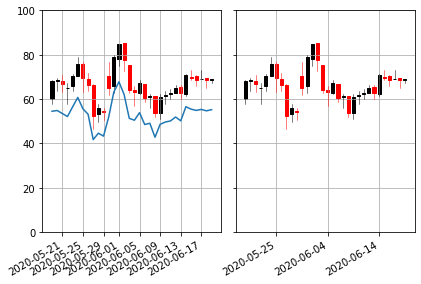

In [27]:
fig, (ax,ax2) = plt.subplots(1,2, sharey=True)

candlestick_ohlc(ax, quotes, width=0.6)
candlestick_ohlc(ax2, quotes, width=0.6)

# ---------------------------------------------------------

sma = [[kurse_c[i] * 0.8] for i in range(len(dates))]
data = pandas.DataFrame(sma, index=dates, columns=["sma"]) #_2
# data = data.astype(float)

data["sma"].plot(ax=ax)

# ---------------------------------------------------------

fig.autofmt_xdate()
fig.tight_layout()

ax.set_ylim(0,100)
ax2.set_ylim(0,100)

axlim = ax.get_xlim()
ax.set_xlim(axlim)
ax2.set_xlim(axlim)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax2.grid(True)